In [1]:
from apiclient.discovery import build
from apiclient.errors import HttpError
import pandas as pd
import numpy as np

In [2]:
DEVELOPER_KEY = # get youtubeapi id here
YOUTUBE_API_SERVICE_NAME = "youtube"
YOUTUBE_API_VERSION = "v3"
youtube = build(YOUTUBE_API_SERVICE_NAME, YOUTUBE_API_VERSION,
    developerKey=DEVELOPER_KEY)

In [3]:
#We define a progress bar to be used during data loading
def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█'):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print('\r%s |%s| %s%% %s' % (prefix, bar, percent, suffix), end = '\r')
    # Print New Line on Complete
    if iteration == total: 
        print()


## Grabbing Youtube Videos:

In [4]:
max_results = 50
videos = youtube.search().list(
    q="iran",
    type="video",
    order = "relevance",
    maxResults=max_results,
    part="id,snippet"
).execute().get('items')


In [5]:
data={
    'title':[],
    'channelId':[],
    'channelTitle':[],
    'description':[],
    'videoId':[],
    'publishedAt':[]
}
l = len(videos)
printProgressBar(0, l, prefix = 'Progress:', suffix = 'Complete', length = 50)
for i,item in enumerate(videos):
    data['title'].append(item['snippet']['title'])
    data['channelId'].append(item['snippet']['channelId'])
    data['channelTitle'].append(item['snippet']['channelTitle'])
    data['description'].append(item['snippet']['description'])
    data['videoId'].append(item['id']['videoId'])
    data['publishedAt'].append(item['snippet']['publishedAt'])
    printProgressBar(i + 1, l, prefix = 'Progress:', suffix = 'Complete', length = 50)

    

Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [6]:
videos_df =pd.DataFrame(data=data)

In [34]:
videos_df.head()

,title,channelId,channelTitle,description,videoId,publishedAt
0,"""Riyadh planned to assassinate Iran's General ...",UCaFxVc4xHOea6s5CO0eBxIA,PressTV,A US media report says top Saudi officials in ...,kE-BUQyS8zY,2018-11-12T09:22:13.000Z
1,🇺🇸 🇮🇷 From rhetoric to reality: The return of ...,UCNye-wNBqNL5ZzHSJj3l8Bg,Al Jazeera English,"Earlier this month, US President Donald Trump ...",WTR-_j87XXI,2018-11-12T07:35:08.000Z
2,"Iran had ""credible info"" on Saudi's assassinat...",UCaFxVc4xHOea6s5CO0eBxIA,PressTV,"Iran's Foreign Minister, Mohammad Javad Zarif,...",XkadKw3N3fE,2018-11-13T11:13:58.000Z
3,David Petraeus on Iran sanctions and helping v...,UCrp_UI8XtuYfpiqluWLD7Lw,CNBC Television,"David Petraeus, KKR Global Institute chair and...",RILhIjjTbEw,2018-11-12T13:19:36.000Z
4,Weekly Update --- President Trump’s Iran Polic...,UCkJ1N-7g9Q6n7KnriGit-Ig,RonPaulLibertyReport,Pompeo comes clean on US policy toward Iran.,pM-7vssczKY,2018-11-13T00:34:35.000Z


In [7]:
videos_df.to_csv('videos.csv',index = False,encoding='utf-8')

## Grabbing Youtube Comments:

In [8]:
threads = youtube.commentThreads().list( 
    videoId="YHNLzmXLW84" ,  
    part='snippet,replies',
    maxResults=100
).execute()

In [9]:
comments_data={
    'id':[],
    'likeCount':[],
    'textDisplay':[],
    'videoId':[],
    'authorDisplayName':[],
    'authorChannelId':[],
    'publishedAt':[]
}
l = len(videos)
printProgressBar(0, l, prefix = 'Progress:', suffix = 'Complete', length = 50)
for i,item in enumerate(videos):
    try:
        threads = youtube.commentThreads().list( 
            videoId=item['id']['videoId'] ,  
            part='snippet,replies',
            maxResults=100
        ).execute().get('items')
        for thread in threads:
            comments_data['id'].append(thread['id'])
            comments_data['likeCount'].append(thread['snippet']['topLevelComment']['snippet']['likeCount'])
            comments_data['textDisplay'].append(thread['snippet']['topLevelComment']['snippet']['textDisplay'])
            comments_data['videoId'].append(thread['snippet']['videoId'])
            comments_data['publishedAt'].append(thread['snippet']['topLevelComment']['snippet']['publishedAt'])
            comments_data['authorChannelId'].append(thread['snippet']['topLevelComment']['snippet']['authorChannelId']['value'])
            comments_data['authorDisplayName'].append(thread['snippet']['topLevelComment']['snippet']['authorDisplayName'])
        printProgressBar(i + 1, l, prefix = 'Progress:', suffix = 'Complete', length = 50)

    except:
        printProgressBar(i + 1, l, prefix = 'Progress:', suffix = 'Complete', length = 50)



Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [10]:
comments_df  = pd.DataFrame(data=comments_data)

In [11]:
comments_df.head()

,id,likeCount,textDisplay,videoId,authorDisplayName,authorChannelId,publishedAt
0,Ugy613DhUjK8QkOXwLR4AaABAg,1,U guys couldent wack a journalist in your own ...,kE-BUQyS8zY,john jackson,UCqQ2Lyzto52tvQrJpLtc2ew,2018-11-13T13:24:55.000Z
1,Ugw3m5fufGSjqGw2i494AaABAg,0,Saudi Arabia is a big joke.... slaves of Ameri...,kE-BUQyS8zY,mohsen majlise,UCp3wi5YQadK4xaIXE2eiEMQ,2018-11-13T07:09:48.000Z
2,Ugw3CDkJG_Pvylbzk8R4AaABAg,0,Yahh good luck with that stupid arabs,kE-BUQyS8zY,haval 7,UCI2iH7P0HgdmDjfzHb0Nn9A,2018-11-13T06:19:57.000Z
3,UgwUVJbGaZVkD0i4gvF4AaABAg,0,Death to alsaud,kE-BUQyS8zY,Manzoor Akhone,UCc9IEQ-oAU0CS0PVqxCjyfg,2018-11-13T04:15:24.000Z
4,UgyooAPj_cza_WJ_Oeh4AaABAg,1,"Not to worry, Haji Ghasem back is covered by H...",kE-BUQyS8zY,Dokhte Iran,UCDDPMgLfslUmr45_jrYoBJQ,2018-11-13T02:32:41.000Z


In [12]:
comments_df.to_csv('comments.csv',index = False,encoding='utf-8')

## Sentiment Analysis

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from textblob import TextBlob
import re

We start by loading the data we saved during the api use.

In [14]:
def clean_text(text):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split())

In [15]:
descriptions=np.concatenate((videos_df.description,comments_df.textDisplay))

In [16]:
descriptions = np.array(list(map(clean_text,descriptions)))

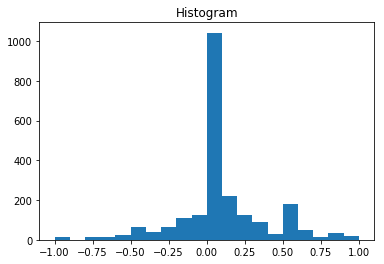

In [17]:
p=[]
for message in descriptions :
    analysis = TextBlob(message) 
    p.append(analysis.sentiment.polarity)
plt.hist(np.array(p), bins=20)  # arguments are passed to np.histogram
plt.title("Histogram")
plt.show()

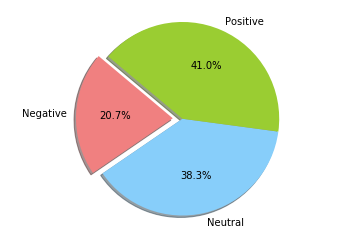

In [18]:
 # Data to plot
sizes = {
    'Negative':0, 'Neutral':0, 'Positive':0
}
for i in p :
    if i > 0:
        sizes['Positive'] +=1
    elif i < 0:
        sizes['Negative'] +=1
    else:
        sizes['Neutral'] +=1


colors = ['lightcoral','lightskyblue', 'yellowgreen']
explode = (0.1, 0, 0) 
plt.pie(sizes.values(), labels=sizes.keys(), colors=colors,explode=explode,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

## WordCloud

In [19]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from PIL import Image
from os import path,getcwd


In [20]:
all_comments = ' '.join(descriptions)

In [21]:
stop_words = set(stopwords.words('english'))

In [22]:

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else getcwd()
iran_mask = np.array(Image.open(path.join(d, "iran1.png")))

cloud = WordCloud(background_color="white", max_words=1000, mask=iran_mask,
               stopwords=stop_words, contour_width=3, contour_color='steelblue')
cloud.generate(all_comments)


In [23]:
d = path.dirname(__file__) if "__file__" in locals() else getcwd()
cloud.to_file(path.join(d, "iran-wc1.png"))


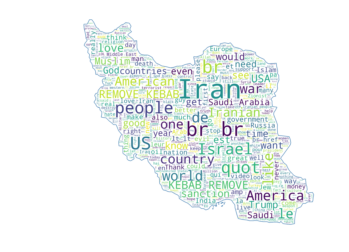

<Figure size 432x288 with 0 Axes>

In [24]:
# show
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.show()

In [25]:
comments_to_channel=(pd.merge(comments_df,videos_df,on='videoId'))[['authorDisplayName','authorChannelId','channelId','channelTitle']]
comments_to_channel.head()

,authorDisplayName,authorChannelId,channelId,channelTitle
0,john jackson,UCqQ2Lyzto52tvQrJpLtc2ew,UCaFxVc4xHOea6s5CO0eBxIA,PressTV
1,mohsen majlise,UCp3wi5YQadK4xaIXE2eiEMQ,UCaFxVc4xHOea6s5CO0eBxIA,PressTV
2,haval 7,UCI2iH7P0HgdmDjfzHb0Nn9A,UCaFxVc4xHOea6s5CO0eBxIA,PressTV
3,Manzoor Akhone,UCc9IEQ-oAU0CS0PVqxCjyfg,UCaFxVc4xHOea6s5CO0eBxIA,PressTV
4,Dokhte Iran,UCDDPMgLfslUmr45_jrYoBJQ,UCaFxVc4xHOea6s5CO0eBxIA,PressTV


In [26]:
# construction des graphes

import plotly.plotly as py
from plotly.graph_objs import *

import networkx as nx
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
names=np.concatenate((comments_to_channel.authorChannelId ,comments_to_channel.channelId))

In [28]:
names=np.unique(names)

In [29]:
for i in range(len(comments_to_channel.authorChannelId)):
    comments_to_channel.authorChannelId[i]=np.where(names==comments_to_channel.authorChannelId[i])[0][0]
for i in range(len(comments_to_channel.channelId)):
    comments_to_channel.channelId[i]=np.where(names==comments_to_channel.channelId[i])[0][0]

In [30]:
comments_to_channel.head()

,authorDisplayName,authorChannelId,channelId,channelTitle
0,john jackson,1629,1133,PressTV
1,mohsen majlise,1582,1133,PressTV
2,haval 7,563,1133,PressTV
3,Manzoor Akhone,1182,1133,PressTV
4,Dokhte Iran,415,1133,PressTV


In [31]:
comments_to_channel.sort_values(by="authorChannelId",inplace=True)

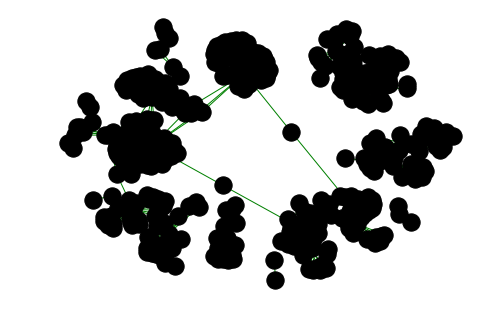

In [32]:


df = pd.DataFrame(data={
    'userFromId':comments_to_channel.authorChannelId,
    'userToId':comments_to_channel.channelId,
    'userFromName':comments_to_channel.authorDisplayName,
    'userToName':comments_to_channel.channelTitle
})
df=df[:500]

df.describe()

G = nx.DiGraph()
G = nx.Graph()

G.add_nodes_from(df['userFromId'])

#G.add_edges_from(zip(df['userFromId'],df['userToId']))

temp = zip(df['userFromId'],df['userToId'])
G.add_edges_from(temp)

# nommer les noeuds (les sommets) nodes ou les vertex
dfLookup = df[['userFromName','userFromId']].drop_duplicates()

dfLookup.head()
for userId in dfLookup['userFromId']:
    temp = dfLookup['userFromName'][df['userFromId']==userId]
    G.node[userId]['userName'] = temp.values[0]

nx.draw(G, pos=nx.spring_layout(G,k=.12),node_color='k',edge_color='g')


pos=nx.spring_layout(G,k=.12)

centralScore = nx.betweenness_centrality(G)